<div style = "height: 700px; width:100%; background-color:#1D8DB0; color:#fff"></div>

<img src="./images/KULeuven.png" >

# Transmissie lijnen

<a href="./slides/transmissielijn.slides.html" target="_blank">![slides](./images/slides-beschikbaar-blue.svg)</a> 
<a href="../Lite/ToegepasteAnalogeElektronica/lab?path=transmissielijn.ipynb" target="_blank">![slides](./images/open_in-JupyterLite-blue.svg)</a>
<a href="../Deck/ToegepasteAnalogeElektronica/lab?path=transmissielijn.ipynb" target="_blank">![slides](./images/JupyterDeck-slides-blue.svg)</a>

<div style = "height: 50px; width:100%; background-color:#1D8DB0;"></div>

<img src="./images/KULeuven.png" >

In [4]:
%config InlineBackend.figure_format = 'svg'
%run cursusdef.py
import schemdraw.elements as elm

###### Netwerk model

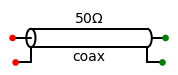

In [8]:
d = schemdraw.Drawing()

d.add(elm.Dot,color='r')
coax=d.add(elm.coax(d='right',length=5, label='$50\Omega$', botlabel='coax'))
d.add(elm.Dot,color='g')
d.add(elm.Line(xy=coax.shieldend,l=0.5,d='down'))
d.add(elm.Line(l=0.5,d='right'))
d.add(elm.Dot,color='g')
d.add(elm.Line(xy=coax.shieldstart,l=0.5,d='down') )
d.add(elm.Line(l=0.5,d='left'))
d.add(elm.Dot,color='r')
d.draw()

######  Overzicht
 


## Transmissie lijn model

###### Kleinsignaal model

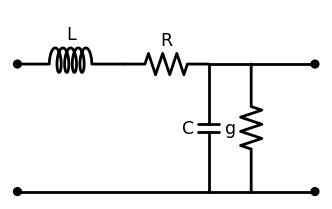

In [22]:
d = schemdraw.Drawing()
d.add(elm.Dot)
L=d.add(elm.INDUCTOR2(d='right', l=2.5,label='L'))
R=d.add(elm.RES(d='right', l=2, label='R'))
d.add(elm.CAP(d='down', label='C'))
d.add(elm.Line(xy=R.end,l=1,d='right'))
g=d.add(elm.RES(d='down', label='g'))
d.add(elm.Line(tox=L.start,d='left'))
d.add(elm.Dot)
d.add(elm.Line(xy=g.end,l=1.5,d='right'))
d.add(elm.Dot)
d.add(elm.Line(xy=g.start,l=1.5,d='right'))
d.add(elm.Dot)
d.draw()

###### Kleinsignaal model

$$ Z_o=\sqrt{\frac{j \omega L+R}{j \omega C+g}}$$

waarbij L de inductantie per eenheid lengte is, C de capaciteit er eenheid lengte is, R de weerstand van de geleider en g de lekgeleidbaarheid van het dielectricum.

In het beste geval is de weerstand van de geleider nul (R=0) en de lek ook nul (g=0). $Z_o$ wordt dan 

###### Vereenvoudigd Kleinsignaal model

$$ Z_o \approx \sqrt{\frac{L}{C}}$$

## Coax kabel

{numref}`coaxdoorsnede` toont de doorsnede van een coax kabel met daarop de belangrijkste parameters voor het bepalen van de C per eenheid lengte en de L per eenheid lengte.

###### Doorsnede coax kabel

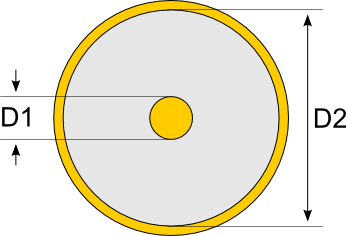

In [1]:
display.Image("./images/coax.png")

Voor een typische [coax-kabel](https://en.wikipedia.org/wiki/Coaxial_cable) met binnendiameter 1.2 mm en buiten diameter  2.8 mm bekomen we de volgende parameters:

In [34]:
def coax_parameters(D1,D2,f,e_r,sigma_c,sigma=1,mu=1,mu_c=1,display=True):
    e_0 = 8.85e-12 # F/m
    mu_0 = 4*np.pi*1e-7 # H/m
    Rs = np.sqrt(np.pi*f*mu_0*mu_c/sigma_c)
    R_p = Rs/np.pi*(1/D1 +1/D2) # Ohms/m
    L_p = mu_0*mu/(2*np.pi)*np.log(D2/D1) #H/m
    G_p = 2*np.pi*sigma/np.log(D2/D1) # S/m
    C_p = 2*np.pi*e_0*e_r/np.log(D2/D1)
    if display:
        print("R = %2.5f ohms/m" % (R_p,))
        print("L = %2.2f nH/m" % (L_p*1e9,))
        print("G = %2.3f S/m" % (G_p,))
        print("C = %2.2f pF/m" % (C_p*1e12,))
        print("Zo= %2.2f Ohm" % (np.sqrt(L_p/C_p)))
    return R_p, L_p, G_p, C_p

R_p, L_p, G_p, C_p=coax_parameters(1.2e-3,2.8e-3,1e6,1.0,5.8e7)


R = 0.09886 ohms/m
L = 169.46 nH/m
G = 7.416 S/m
C = 65.63 pF/m
Zo= 50.81 Ohm



Het verloop van de karakteristieke impedantie ziet er voor deze coax kabel uit als aangegeven in {numref}`t_Z-f`

###### Verloop van de karakteristieke impedantie van een RG-58 coax als functie van de frequentie.

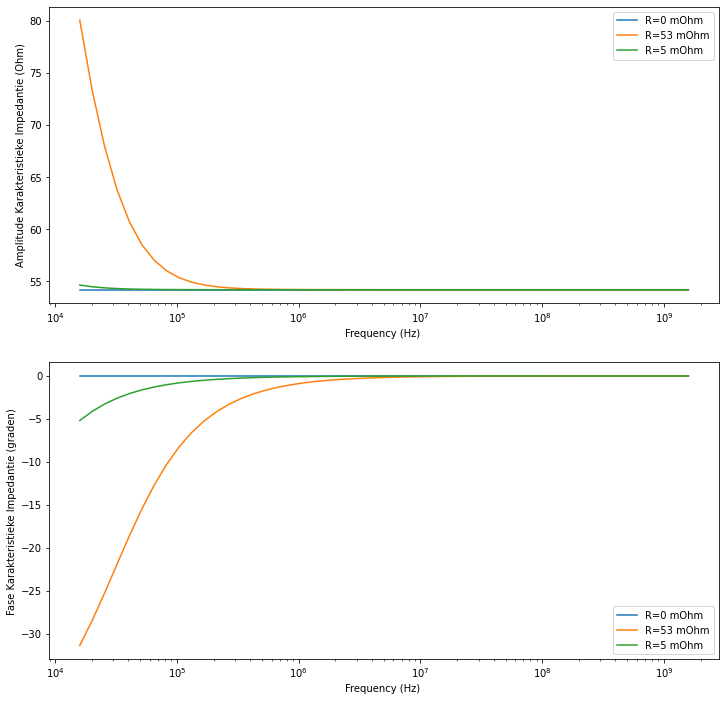

In [2]:
fig,ax = plt.subplots(2,1,figsize=(12,12))
w=np.logspace(5,10,50)
z=np.sqrt((1.0j*w*273e-9+0.0)/(1.0j*w*93e-12))
z2=np.sqrt((1.0j*w*273e-9+0.053)/(1.0j*w*93e-12))
z3=np.sqrt((1.0j*w*273e-9+0.005)/(1.0j*w*93e-12))
ax[0].plot(w/2/np.pi,abs(z), label="R=0 mOhm")
ax[0].plot(w/2/np.pi,abs(z2), label="R=53 mOhm")
ax[0].plot(w/2/np.pi,abs(z3), label="R=5 mOhm")
ax[1].plot(w/2/np.pi,np.angle(z,deg=True), label="R=0 mOhm")
ax[1].plot(w/2/np.pi,np.angle(z2,deg=True), label="R=53 mOhm")
ax[1].plot(w/2/np.pi,np.angle(z3,deg=True), label="R=5 mOhm")
ax[0].set_xscale('log')
ax[0].set_ylabel('Amplitude Karakteristieke Impedantie (Ohm)',size = 10)
ax[0].set_xlabel('Frequency (Hz) ',size = 10)
ax[1].set_xscale('log')
ax[1].set_ylabel('Fase Karakteristieke Impedantie (graden)',size = 10)
ax[1].set_xlabel('Frequency (Hz) ',size = 10);
ax[0].legend()
ax[1].legend();

Uit {numref}`t_Z-f` merken we dat bij lage frequenties deze karakteristieke impedantie in belangrijke mate verschilt van 50 Ohm. De negatieve fase geeft aan dat bij lage frequenties de lijn zich capacitief gedraagt.

## Twisted pair kabel

{numref}`twisted_pairdoorsnede` toont de doorsnede van een twisted pair kabel met daarop de belangrijkste parameters voor het bepalen van de C per eenheid lengte en de L per eenheid lengte.



###### Doorsnede twisted pair kabel

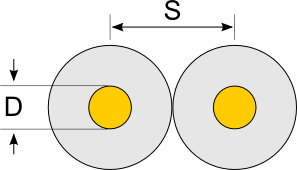

In [2]:
display.Image("./images/twisted_pair.png")

## striplijn



## Microstriplijn

De relevante parameters hier zijn de breedte van het baantje ($w$) en de  dikte van het dielectricum ($h$). Natuurlijk speelt de relatieve permitiviteit van het dielectricum ($\epsilon_r$) ook mee.

In [1]:
def mstrip_anal(s,er):
    """
    Microstrip zero thickness strips design function
    
    s = w/h
    er = material relative permittivity
    
    Z0 returned
    e_eff returned

    """
    e_eff = eps_eff(s,er)
    t = (30.67/s)**0.75
    Z0 = 60/np.sqrt(e_eff) * \
         np.log((6+(2*np.pi-6)*np.exp(-t))/s + np.sqrt(1+4/s**2))
    return Z0, e_eff

def mstrip_dsgn(Z0,er):
    """
    Mircostrip zero thickness strips design function
    
    Z0 = desired characteristic impedance
    er = material relative permittivity
    
    s = w/h is returned
    e_eff returned
    
    """
    if Z0 <= (44-2*er):
        q = 60*np.pi*np.pi/(Z0*np.sqrt(er))
        s = 2/np.pi*((q-1)-np.log(2*q-1) + \
                 (er-1)/(2*er)*(np.log(q-1)+0.29-0.52/er))
        
    else:
        p = np.sqrt((er+1)/2)*Z0/60+(er-1)/(er+1)*(0.23 + 0.12/er)
        s = 8*np.exp(p)/(np.exp(2*p)-2)
    e_eff = eps_eff(s,er)
    return s, e_eff

def eps_eff(s,er):
    """
    Find microstrip e_eff given s = w/h and er
    """
    x = 0.56*((er-0.9)/(er+3))**0.05
    y = 1 + 0.02*np.log((s**4 + 3.7e-4*s**2)/(s**4+0.43)) + \
        0.05*np.log(1+1.7e-4*s**3)
    e_eff = (er+1)/2 + (er-1)/2*(1+10/s)**(-x*y)
    return e_eff

def mstrip_extra(Z0,er,f = 1e9,h = 1):
    """
    Extra parameters: L', C', beta, \lambda_g
    
    Z0 = characteristic impedance in Ohms
    er = relative permittivity
    f = operatng frequency in Hz
    h = substrate height in m
    """
    c = 3e8 # m/s
    s, e_eff = mstrip_dsgn(Z0,er)
    C_p = np.sqrt(e_eff)/(Z0*c) # F/m
    L_p = Z0**2*C_p  #H/m
    R_p = 0
    G_p = 0
    alpha = 0
    beta = 2*np.pi/c*np.sqrt(e_eff) # rad/m
    lambda_g = c/np.sqrt(e_eff)/f # m
    print('Breedte van het baantje w = %1.3e mm, Rel. perm: e_eff = %2.3f' % (s*h*1000,e_eff))
    print('Breedte van het baantje  w = %1.3e mils (vaak voorkomende PCB eenheid)' % (s*h*1000/0.0254,))
    print('-----------------------------------------------------')
    print("Weerstand per eenheid lengte: R' = 0 ohms/m")
    print("Inductantie per eenheid lengte: L' = %1.3e nH/m" % (L_p*1e9,))
    print("lek geleidbaarheid per eenheid lengte: G' = 0 S/n")
    print("Capaciteit per eenheid lengte: C' = %1.3e pF/m" % (C_p*1e12,))
    print('-----------------------------------------------------')
    print('Golflengte in de vrije ruimte: lambda = %1.3e cm' % (c/f*1e2,))
    print('Golflengte in het medium (guide): lambda_g = %1.3e cm' % (lambda_g*1e2,))

Een voorbeeld: 

We willen een 50 Ohm transmissielijn bekomen voor een 2.4 GHz signaal op een PCB waarvan de relatieve permitiviteit van het dielectricum $\epsilon_r$=4.6. De dikte van het dielectricum is 1/16 inch

In [9]:
mstrip_extra(50,4.6,f= 2.4e9,h=1/16*2.54*1/100) #in*cm/in*m/cm

Breedte van het baantje w = 2.931e+00 mm, Rel. perm: e_eff = 3.460
Breedte van het baantje  w = 1.154e+02 mils (vaak voorkomende PCB eenheid)
-----------------------------------------------------
Weerstand per eenheid lengte: R' = 0 ohms/m
Inductantie per eenheid lengte: L' = 3.100e+02 nH/m
lek geleidbaarheid per eenheid lengte: G' = 0 S/n
Capaciteit per eenheid lengte: C' = 1.240e+02 pF/m
-----------------------------------------------------
Golflengte in de vrije ruimte: lambda = 1.250e+01 cm
Golflengte in het medium (guide): lambda_g = 6.720e+00 cm


In [7]:
print('Quart golflengte bij 2.4 GHz  = %1.3f cm' % (6.72/4,))

Quart golflengte bij 2.4 GHz  = 1.680 cm


In [5]:
mstrip_extra(64,4.6,f= 0.5e9,h=1/16*2.54*1/100) #in*cm/in*m/cm

Breedte van het baantje w = 1.884e+00 mm, Rel. perm: e_eff = 3.338
Breedte van het baantje  w = 7.418e+01 mils (vaak voorkomende PCB eenheid)
-----------------------------------------------------
Weerstand per eenheid lengte: R' = 0 ohms/m
Inductantie per eenheid lengte: L' = 3.898e+02 nH/m
lek geleidbaarheid per eenheid lengte: G' = 0 S/n
Capaciteit per eenheid lengte: C' = 9.516e+01 pF/m
-----------------------------------------------------
Golflengte in de vrije ruimte: lambda = 6.000e+01 cm
Golflengte in het medium (guide): lambda_g = 3.284e+01 cm


## Microstrip Analyse Plots
We vergelijken 3 types: Micro-fiber PTFE, FR4, en Ceramisch-gevulde PTFE voor een aantal waardes van $w/h$.

###### Verloop van de karakteristieke impedantie van een microstriplijn als functie van de dimmensies.

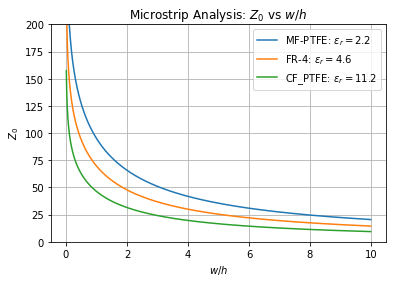

In [24]:
s = np.arange(0.01,10,.01)
Z0 = np.zeros_like(s)
e_eff = np.zeros_like(s)
er = (2.2,4.6,11.2)
for m in range(3):
    for k,sk in enumerate(s):
        Z0[k],e_eff[k] = mstrip_anal(sk,er[m])
    plt.plot(s,Z0)
plt.ylim([0,200])
plt.xlabel(r'$w/h$')
plt.ylabel(r'$Z_0$')
plt.title(r'Microstrip Analysis: $Z_0$ vs $w/h$')
plt.legend((r'MF-PTFE: $\epsilon_r = 2.2$',r'FR-4: $\epsilon_r=4.6$',
        r'CF_PTFE: $\epsilon_r=11.2$'),loc='best')
plt.grid();

###### Verloop van de dielectrische constante van een microstriplijn als functie van de dimmensies.

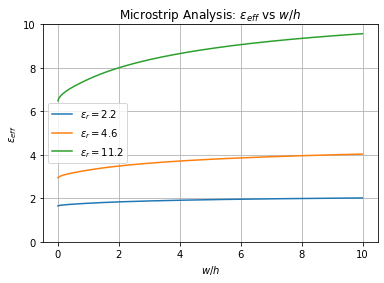

In [12]:
s = np.arange(0.01,10,.01)
Z0 = np.zeros_like(s)
e_eff = np.zeros_like(s)
er = (2.2,4.6,11.2)
for m in range(3):
    for k,sk in enumerate(s):
        Z0[k],e_eff[k] = mstrip_anal(sk,er[m])
    plt.plot(s,e_eff)
plt.ylim([0,10])
plt.xlabel(r'$w/h$')
plt.ylabel(r'$\epsilon_{eff}$')
plt.title(r'Microstrip Analyse: $\epsilon_{eff}$ vs $w/h$')
plt.legend((r'$\epsilon_r = 2.2$',r'$\epsilon_r=4.6$',
        r'$\epsilon_r=11.2$'),loc='best')
plt.grid();

## Microstrip Design Plots

Voor het design doen we eigenlijk het omgekeerde van de analyse: we vertrekken van een gevraagde $Z_o$ en we rekenen uit wat de $w$ en $h$ moeten zijn om dit te bekomen.
We vergelijken 3 types: Micro-fiber PTFE, FR4, en Ceramisch-gevulde PTFE voor een aantal waardes van $w/h$.

###### dimmensies om de vereiste karakteristieke impedantie van een microstriplijn te bekomen.

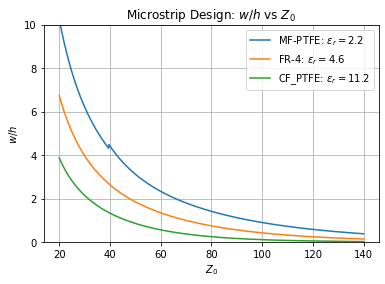

In [18]:
Z0 = np.arange(20,140,.1)
s = np.zeros_like(Z0)
e_eff = np.zeros_like(Z0)
er = (2.2,4.6,11.2)
for m in range(3):
    for k,Z0k in enumerate(Z0):
        s[k],e_eff[k] = mstrip_dsgn(Z0k,er[m])
    plt.plot(Z0,s)
plt.ylim([0,10])
plt.xlabel(r'$Z_0$')
plt.ylabel(r'$w/h$')
plt.title(r'Microstrip Design: $w/h$ vs $Z_0$')
plt.legend((r'MF-PTFE: $\epsilon_r = 2.2$',r'FR-4: $\epsilon_r=4.6$',
        r'CF_PTFE: $\epsilon_r=11.2$'),loc='best')
plt.grid();

###### De relatie tussen effectieve dielectrische constante en karakteristieke impedantie.

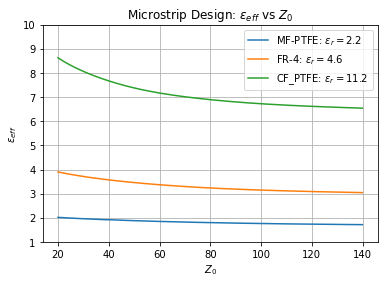

In [21]:
for m in range(3):
    for k,Z0k in enumerate(Z0):
        s[k],e_eff[k] = mstrip_dsgn(Z0k,er[m])
    plt.plot(Z0,e_eff)
plt.ylim([1,10])
plt.xlabel(r'$Z_0$')
plt.ylabel(r'$\epsilon_{eff}$')
plt.title(r'Microstrip Design: $\epsilon_{eff}$ vs $Z_0$')
plt.legend((r'MF-PTFE: $\epsilon_r = 2.2$',r'FR-4: $\epsilon_r=4.6$',
        r'CF_PTFE: $\epsilon_r=11.2$'),loc='best')
plt.grid();